<a href="https://colab.research.google.com/github/allanbraquiel/Notebooks/blob/master/Dados_Sobre_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados sobre diabetes**

O conjunto de dados de Diabetes das Índias Pima do Arizona nos EUA, foi desenvolvida pelo
National Institute of Diabetes and Digestive and Kidney Diseases e cedida em 1990 ao repositório da Universidade da Califórnia, Irvine. O conjunto de dados descreve 768 pacientes do género sexual feminino com idades compreendidas entre 21 e 81 anos, divididos em 500 casos que não padecem de Diabetes Mellitus e os restantes sim. 

O conjunto de dados tem 9 atributos:
1. Pregnancies - nº de gravidezes;
2. Glucose - Plasma do Teste Oral de Tolerância à Glicose de 2 horas;
3. Blood Pressure - Pressão sangúinea;
4. Skin Thickness - Espessura da dobra cutânea tricipital (espessura da pele);
5. Insulin - Nível de Insulina em soro de 2 horas;
6. BMI - Índice de Massa Corporal;
7. DiabetesPedigreeFunction - Função de linhagem de diabetes, valores que medem a tendência ao desenvolvimento de diabetes;
8. Age - Idade;
9. Outcome - Surgimento de Diabetes no espaço de 5 anos. Esta é a classe de predição e pode assumir o valor 0=não diabético e 1=diabético.

Fonte da informação: https://jreduardo.github.io/ce064-ml/work5.html

https://comum.rcaap.pt/bitstream/10400.26/18285/1/Lu%C3%ADs-Miguel-Candeias-Borges.pdf

Valores aceitáveis de Insulina em jejum: 100, em qualquer momento: 140

Os valores de referência do exame da glicose em jejum são:

Normal: inferior a 99 mg/dL;

Pré-diabetes: entre 100 e 125 mg/dL;

Diabetes: superior a 126 mg/dL em dois dias diferentes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Biblioteca do Plotly para plotar os gráficos 
import cufflinks as cf
cf.go_offline()
import plotly
import plotly.graph_objs as go
import plotly.offline as py

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

Para renderizar no Colab

In [2]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

Aqui definimos o tamanho da imagem a partir da biblioteca pylab

In [3]:
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

Carregando o dataset que está disponível em um repositório no github

In [4]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

In [5]:
df = pd.read_csv(url, sep=",", encoding="utf-8")

In [6]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Descrevendo todas as colunas para encontrar os valor mínimo, máximo , média e os quadrantes

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Verificando a distribuição dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f152b6d8>,
      dtype=object)

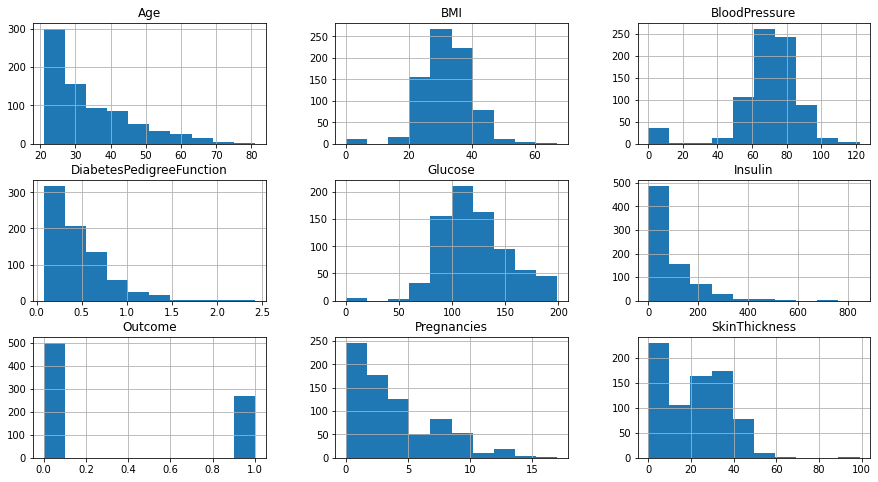

In [9]:
#plt.rcParams["figure.figsize"] = [22, 18]
df.hist(bins=10)

Observamos que em algumas colunas como BloodPressure(Presão Sanguínea), Glucose (Glicose), SkinThickness (Espessura da pele), Insulin (Insulina), BMI (Indice de massa corporal), existem alguns registros com valor 0, portanto iremos substituir este valor pela média, para que não interfira do desenpenho do modelo

In [10]:
df[["BloodPressure", "Glucose", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]].describe()

,BloodPressure,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,69.105469,120.894531,20.536458,79.799479,31.992578,0.471876
std,19.355807,31.972618,15.952218,115.244002,7.884160,0.331329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,62.000000,99.000000,0.000000,0.000000,27.300000,0.243750
50%,72.000000,117.000000,23.000000,30.500000,32.000000,0.372500
75%,80.000000,140.250000,32.000000,127.250000,36.600000,0.626250
max,122.000000,199.000000,99.000000,846.000000,67.100000,2.420000


In [11]:
df.BloodPressure = df.BloodPressure.replace(0, df.BloodPressure.mean())
df.Glucose = df.Glucose.replace(0, df.Glucose.mean())
df.SkinThickness = df.SkinThickness.replace(0, df.SkinThickness.mean())
df.Insulin = df.Insulin.replace(0, df.Insulin.mean())
df.BMI = df.BMI.replace(0, df.BMI.mean())

In [12]:
df[["BloodPressure", "Glucose", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]].describe()

,BloodPressure,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,72.254807,121.681605,26.606479,118.660163,32.450805,0.471876
std,12.115932,30.436016,9.631241,93.080358,6.875374,0.331329
min,24.000000,44.000000,7.000000,14.000000,18.200000,0.078000
25%,64.000000,99.750000,20.536458,79.799479,27.500000,0.243750
50%,72.000000,117.000000,23.000000,79.799479,32.000000,0.372500
75%,80.000000,140.250000,32.000000,127.250000,36.600000,0.626250
max,122.000000,199.000000,99.000000,846.000000,67.100000,2.420000


Verificando a distribuição novamente

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f130b390>,
      dtype=object)

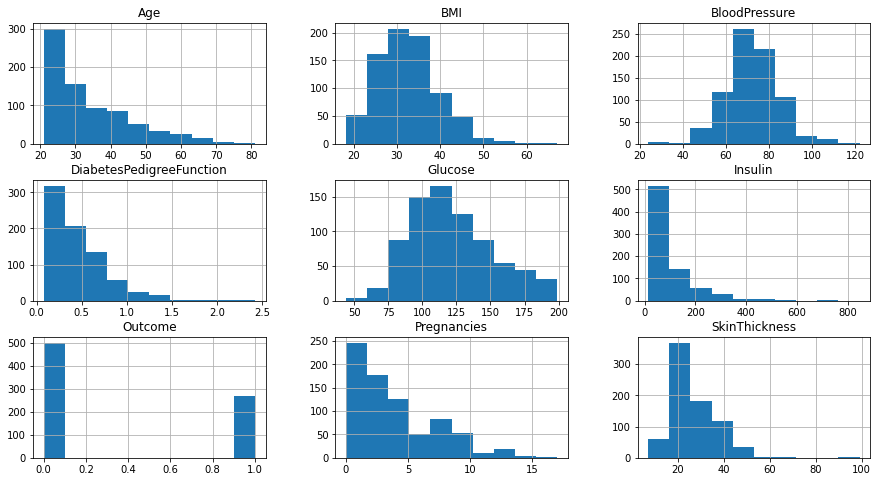

In [13]:
df.hist(bins=10)

Pesquisando as observações onde a insulina é maior que 140 e a glicose é maior que 126

In [14]:
df.query("Insulin > 140 and Glucose > 126 and Outcome == 0").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0
73,4,129.0,86.0,20.0,270.0,35.1,0.231,23,0
95,6,144.0,72.0,27.0,228.0,33.9,0.255,40,0
144,4,154.0,62.0,31.0,284.0,32.8,0.237,23,0
150,1,136.0,74.0,50.0,204.0,37.4,0.399,24,0


In [15]:
df.query("Insulin > 140 and Glucose > 126 and Outcome == 1").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
24,11,143.0,94.0,33.0,146.0,36.6,0.254,51,1


Pesquisando quantas pessoas tem nivel de insulina entre 100 e 160 e glicose entre 65 e 99.

In [16]:
df.query("Insulin >= 100 and Insulin <= 160 and Glucose >=65 and Glucose <= 99")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
27,1,97.0,66.0,15.0,140.0,23.2,0.487,22,0
396,3,96.0,56.0,34.0,115.0,24.7,0.944,39,0
467,0,97.0,64.0,36.0,100.0,36.8,0.600,25,0
483,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
551,3,84.0,68.0,30.0,106.0,31.9,0.591,25,0
554,1,84.0,64.0,23.0,115.0,36.9,0.471,28,0
567,6,92.0,62.0,32.0,126.0,32.0,0.085,46,0
573,2,98.0,60.0,17.0,120.0,34.7,0.198,22,0
593,2,82.0,52.0,22.0,115.0,28.5,1.699,25,0
623,0,94.0,70.0,27.0,115.0,43.5,0.347,21,0


O boxplot mostra os valores mínimos e máximo, média, mediana e os valores discrepantes do valores normais(outliers)

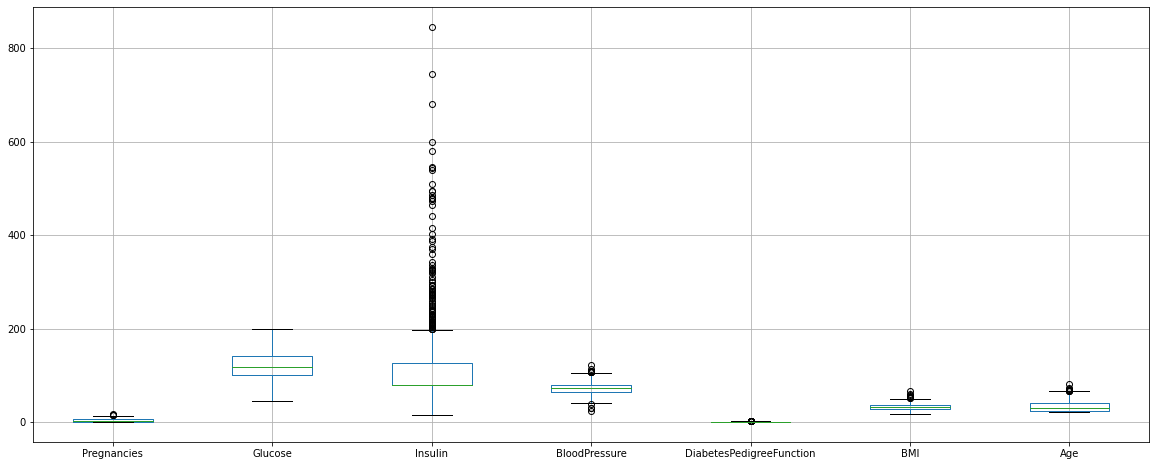

In [17]:
plt.figure( figsize=(20, 8))
df.boxplot(column=["Pregnancies","Glucose", "Insulin", "BloodPressure", "DiabetesPedigreeFunction", "BMI", "Age"])

Este boxplot mostra a distribuição dos valores das variável Glucose entre os que tem diabetes (lilás) e os que não tem (vermelho)

In [18]:
import plotly.express as px

fig = px.box(df, y="Glucose", color="Outcome", points="all")

fig.show()

Distribuição dos valores das variável Insulin entre os que tem diabetes (lilás) e os que não tem (vermelho)

In [19]:
fig = px.box(df, y="Insulin", color="Outcome", points="all")
fig.show()

Este gráfico mostra a relação dos entre as colunas Glucose e Insulin, onde o mais escuro mostra os não diabéticos e o mais claro mostra os diabéticos

In [20]:
fig = px.scatter(df, x="Glucose", y="Insulin", color="Outcome")
fig.show()

Este gráfico mostra a relação entre a taxa de glicose e a idade da pessoa, onde as informaçoes mais escuras são de não diabéticos e o mais claro de diabéticos

In [21]:
fig = px.scatter(df, x="Glucose", y="Age", color="Outcome")
fig.show()

Agora, a relação por idade e nível de insulina

In [22]:
fig = px.scatter(df, x="Insulin", y="Age", color="Outcome", title="Distribuição por Nível de Insulina e Idade")
fig.show()

Distribuição dos registros que foram diagnosticado como diabéticos e não diabéticos

In [23]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
df2 = df.Outcome.value_counts()

cores = ['#63B8FF','#EE3B3B']

# Criando gráfico:
trace = go.Pie(labels = ["Não diabéticos", "Diabéticos"],
               values = df2.values,
               marker = {'colors': cores},
               direction='clockwise'
              )

# Armazenando gráfico em uma lista:
data = [trace]

# Criando Layout:
layout = go.Layout(title='Distribuição dos resultados')

# Criando figura que será exibida:
fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=800, height=800)

py.iplot(fig)

Plotando usando o Plotly

In [25]:
df.Pregnancies.value_counts().iplot(kind="bar", title="Quantidade de gravidezes")

In [26]:
com_diabetes = df.query("Outcome == 1")
sem_diabetes = df.query("Outcome == 0")
com_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53,1


In [27]:
trace1 = go.Bar(x = df.Pregnancies,
                y = df["Outcome"],
                name = 'Com diabetes',
                marker = {'color': 'red'})
trace2 = go.Bar(x = df.Pregnancies,
                y = df["Outcome"],
                name = 'Sem diabetes',
                marker = {'color': 'blue'})
data = [trace1, trace2]
layout = go.Layout(title = 'Quantidade de gravidez com e sem diabetes',
                  barmode = 'stack')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [28]:
df.groupby("Pregnancies")["Outcome"].sum()

Pregnancies
0     38
1     29
2     19
3     27
4     23
5     21
6     16
7     25
8     22
9     18
10    10
11     7
12     4
13     5
14     2
15     1
17     1
Name: Outcome, dtype: int64

In [29]:
pd.pivot_table(df, index=["Pregnancies"], values=["Outcome"], aggfunc={"Outcome": np.sum})

,Outcome
Pregnancies,
0,38
1,29
2,19
3,27
4,23
5,21
6,16
7,25
8,22


In [30]:
pd.pivot_table(df, index=["Outcome", "Age"], values=["Pregnancies"], aggfunc={"Pregnancies": np.sum})

Pregnancies
Outcome Age             
0       21            65
        22            88
        23            47
        24            78
        25            59
...                  ...
1       61             4
        62             2
        66             8
        67             4
        70             4

[96 rows x 1 columns]

In [31]:
fig = px.box(df, y="Insulin")
fig.update_layout(width=800, height=800)
fig.show()

# Usando Machine Learning

OBS:  
Usar tree.Classifier primeiro par indetificar as melhores Features 
Noramlizar somente as features (X) não o target

Usando um mapa de calor usando o Seaborn para verificar a correlação entre as colunas, sendo que 1 determina uma correlaçao perfeita, -1 a anti correlação perfeita e 0 mostra que não tem correlação nenhuma

In [32]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



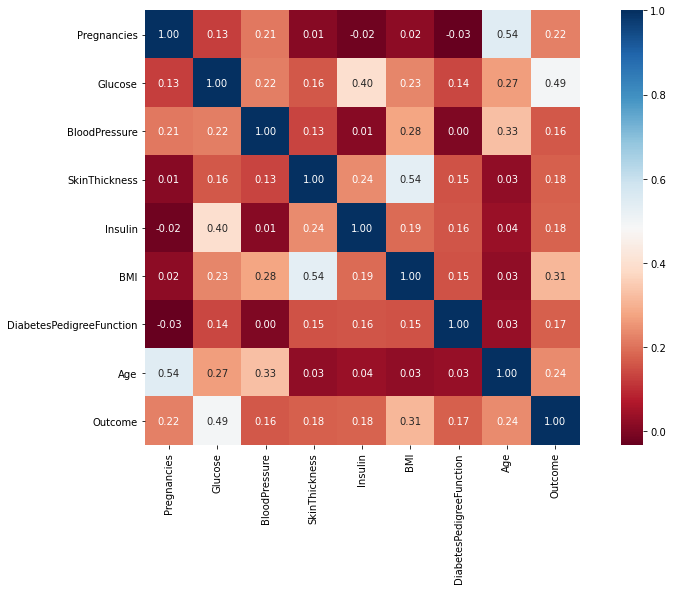

In [33]:
df_correlacao = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);
#plt.show()

Separando as features

In [34]:
x_data1 = df.drop(["Outcome"], axis=1, inplace=False)
y_data = df["Outcome"]

Normalizando os dados

In [35]:
X = (x_data1 - np.min(x_data1)) / (np.max(x_data1) - np.min(x_data1)).values

In [36]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


Separando os dados de teste e de treino

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (537, 8)
x test:  (231, 8)
y train:  (537,)
y test:  (231,)


# Aplicando Machine Learning com Arvore de Decisão

In [38]:
from sklearn import tree
arvore = tree.DecisionTreeClassifier()

In [39]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
result = arvore.predict(x_test)

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[106  45]
 [ 25  55]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       151
           1       0.55      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



Features mais importantes para o modelo

In [42]:
arvore.feature_importances_

array([0.03678837, 0.31229699, 0.08742683, 0.06984915, 0.03234616,
       0.18226104, 0.14312926, 0.1359022 ])

In [43]:
feature_imp = pd.Series(arvore.feature_importances_, index=X.columns)
#feature_imp = pd.Series(arvore.feature_importances_, index=x_treino.columns)

In [44]:
feature_imp

Pregnancies                 0.036788
Glucose                     0.312297
BloodPressure               0.087427
SkinThickness               0.069849
Insulin                     0.032346
BMI                         0.182261
DiabetesPedigreeFunction    0.143129
Age                         0.135902
dtype: float64

Visualizando as Features mai importantes

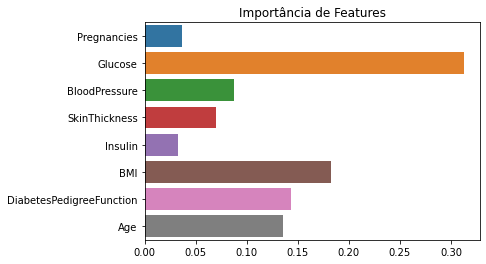

In [45]:
# Usando o Seaborn
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
#plt.xlabel("Importância de Features")
#plt.ylabel("Features")
plt.title("Importância de Features")

plt.show()

In [46]:
# Usando o Plotly
feature_imp.sort_values().iplot(kind="barh", title="Importância das Features", colors='rgb(158,202,225)', gridcolor="cyan")

#Catálogo de Cores:

aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

Agora que sabemos as features mais importante podemos usar somene algumas delas

In [47]:
X = X.drop(["Insulin", "Pregnancies", "SkinThickness", "BloodPressure"], axis=1)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (537, 4)
x test:  (231, 4)
y train:  (537,)
y test:  (231,)


In [49]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
result = arvore.predict(x_test)

In [51]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[108  43]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.55      0.66      0.60        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.71      0.70      0.70       231



#Usando o KNN para classificação

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17, p=12)
knn.fit(x_train, y_train)
labels = knn.predict(x_test)
print(len(labels))

231


In [53]:
np.sum(labels == y_test)

173

In [54]:
(labels == y_test).sum()

173

In [55]:
100 * (labels == y_test).sum() / len(x_test)

74.89177489177489

In [56]:
# Acurácia
knn.score(x_test, y_test)

0.7489177489177489

In [57]:
from sklearn.metrics import classification_report

predictions = knn.predict(x_test)
print(confusion_matrix(y_test, predictions))
print("Score: ", knn.score(x_test, y_test))
print(classification_report(y_test, predictions))

[[119  32]
 [ 26  54]]
Score:  0.7489177489177489
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.63      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



#Usando redes neurais com o MLPClassifier

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [59]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [60]:
predictions = mlp.predict(x_test)
print(confusion_matrix(y_test, predictions))
print("Score: ", mlp.score(x_test, y_test))
print(classification_report(y_test, predictions))

[[118  33]
 [ 28  52]]
Score:  0.7359307359307359
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



Resultado:
Matrix de confusão  117 acertaram 34 erraram da classe 0 - 
30 erraram e 50 acertaram na classe 1

Legenda

Precisão: TP / (TP + FP) >> TP: verdadeiros positivos; FP: falsos positivos

Recall: TP / (TP + FN) >> TP: verdadeiros positivos; FN: falsos negativos

fi-score: (2 * precision * recall)  / (precision + recall) = mais próximo de 1 melhor

support: quantidade saidas